# Flight Delay: Data Preprocessing
- 원본: [월간 데이콘 항공편 지연 예측 AI 경진대회](https://dacon.io/competitions/official/236094/data)

- 해당 프로젝트에서는 train data만 사용

- 원활한 EDA를 위해 **변수들의 LabelEncoding 직전**까지의 전처리 과정만을 포함함.


## 🔌 Dataset Info.

### 1️⃣ train.csv
- 1,000,000개의 데이터
- ID : 샘플 고유 id
- 항공편 운항 관련 정보
- Month: 해당 항공편의 출발 월
- Day_of_Month: Month에 해당하는 월의 날짜
- Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (현지 시각, HH:MM 형식)
- Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (현지 시각, HH:MM 형식)
- Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
- Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
- Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
- Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
- Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
- Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
- Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
- Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
- Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
- Airline: 해당 항공편을 운항하는 항공사
- Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 
- (IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
- Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
- Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
- Delay: 항공편 지연 여부 (Not_Delayed, Delayed)

## Import Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

In [2]:
df = pd.read_parquet('../train.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [3]:
df.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay
0,TRAIN_000000,4,15,NaN,NaN,0,0,OKC,13851,Oklahoma,HOU,12191,Texas,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,None
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,None
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,NaN,N595UA,None
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,None


In [4]:
df.shape

(1000000, 19)

## Missing Data

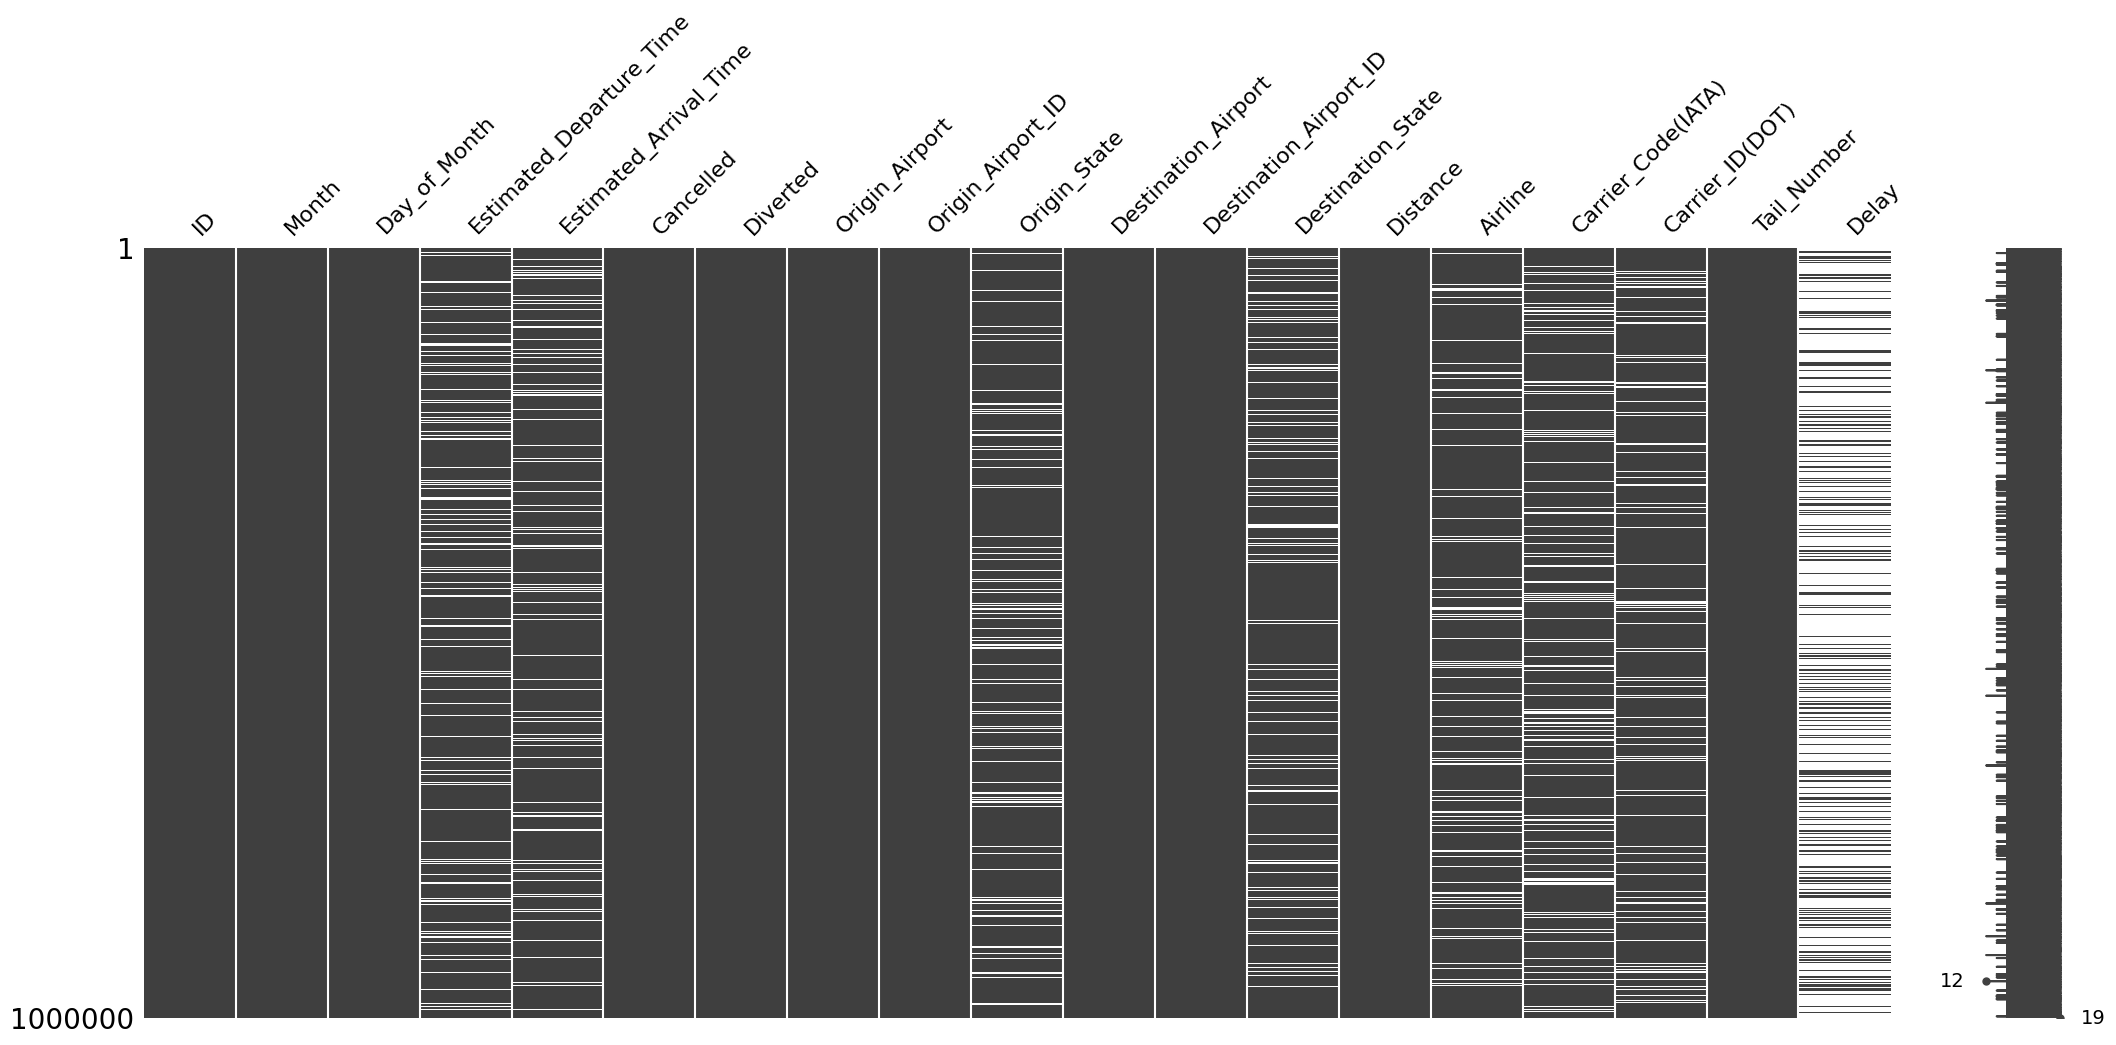

In [5]:
msno.matrix(df);

### 1. Airline, Carrier_Code(DOT)
- Airline과 Carrier_Code(DOT)는 1:1 대응값임
- 딕셔너리 생성하여 결측치 대체

In [6]:
cond1 = df['Carrier_ID(DOT)'].isnull()
cond2 = ~df['Airline'].isnull()
# loc[조건, : ]
print("Carrier_ID(DOT) 복구 가능한 데이터의 개수 :", len(df.loc[cond1 & cond2, :]))

Carrier_ID(DOT) 복구 가능한 데이터의 개수 : 97114


In [7]:
# Airline, Carrier_ID 딕셔너리 생성
airline_to_cid = df.dropna(subset=['Carrier_ID(DOT)', 'Airline']).set_index('Airline')['Carrier_ID(DOT)'].to_dict()

# 'Carrier_ID(DOT)' 결측치 대체
mask = df['Carrier_ID(DOT)'].isnull() & ~df['Airline'].isnull()
df.loc[mask, 'Carrier_ID(DOT)'] = df.loc[mask, 'Airline'].map(airline_to_cid)

# 'Airline' 결측치 대체
cid_to_airline = {v: k for k, v in airline_to_cid.items()}  # 딕셔너리 뒤집기 --> {ID:Airline}
mask = df['Airline'].isnull() & ~df['Carrier_ID(DOT)'].isnull()
df.loc[mask, 'Airline'] = df.loc[mask, 'Carrier_ID(DOT)'].map(cid_to_airline)

### 2. Origin State, Destination State
- Airport:State 딕셔너리 생성하여 결측치 대체

In [8]:
# Origin, Destination 딕셔너리 생성
origin_state_dict = df.dropna(subset=['Origin_State']).set_index('Origin_Airport')['Origin_State'].to_dict()
dest_state_dict = df.dropna(subset=['Destination_State']).set_index('Destination_Airport')['Destination_State'].to_dict()

# Origin 결측치 대체
mask_origin = df['Origin_State'].isnull() & df['Origin_Airport'].notnull()
df.loc[mask_origin, 'Origin_State'] = df.loc[mask_origin, 'Origin_Airport'].map(origin_state_dict)

# Destination 결측치 대체
mask_dest = df['Destination_State'].isnull() & df['Destination_Airport'].notnull()
df.loc[mask_dest, 'Destination_State'] = df.loc[mask_dest, 'Destination_Airport'].map(dest_state_dict)


### 3. Estimated Departure Time, Estimated Arrival Time
- 출발공항-도착공항 사이의 비행 시간 계산하여 역산

#### 3.1. EDT, EAT 둘 다 없는 행 삭제

In [9]:
df_notnull = df[(df['Estimated_Departure_Time'].notna()) & (df['Estimated_Arrival_Time'].notna())]
df_notnull.shape

(793629, 19)

#### 3.2. 공항별 평균 시간 'Time' 변수 생성 (단위: 분)
- 시:분 형태(예: 14시30분 = 1430)로 되어 있는 시간 변수를 분 단위(0~1440)으로 변환

In [10]:
# 시와 분 데이터 추출
df_notnull["Dep_hour"] = (df_notnull["Estimated_Departure_Time"] // 100).astype(int)
df_notnull["Dep_minute"] = (df_notnull["Estimated_Departure_Time"] % 100).astype(int)
df_notnull["Arr_hour"] = (df_notnull["Estimated_Arrival_Time"] // 100).astype(int)
df_notnull["Arr_minute"] = (df_notnull["Estimated_Arrival_Time"] % 100).astype(int)

# 분 단위로 변환
df_notnull['C_M_Dep'] = df_notnull["Dep_hour"] * 60 + df_notnull["Dep_minute"]  # Departure in minutes
df_notnull['C_M_Arr'] = df_notnull["Arr_hour"] * 60 + df_notnull["Arr_minute"]  # Arrival in minutes

# EDT, EAT 시차 계산하여 Time 변수 생성
diff_time = df_notnull['C_M_Arr'] - df_notnull['C_M_Dep']
df_notnull['Time'] = np.where(diff_time < 0, 1440 + diff_time, diff_time)

# C_M_Arr, C_M_Dep, Dep_hour, Dep_minute, Arr_hour, Arr_minute 변수 삭제 
df_notnull.drop(columns=['C_M_Arr', 'C_M_Dep', 'Dep_hour', 
                         'Dep_minute', 'Arr_hour', 'Arr_minute'], axis=1, inplace=True)

df_notnull.head()


/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_4254/2480141284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull["Dep_hour"] = (df_notnull["Estimated_Departure_Time"] // 100).astype(int)
/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_4254/2480141284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull["Dep_minute"] = (df_notnull["Estimated_Departure_Time"] % 100).astype(int)
/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_4254/2480141284.py:4: Settin

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Time
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,SLC,14869,Utah,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None,164
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,LGA,12953,New York,544.0,American Airlines Inc.,AA,19805.0,N103US,None,115
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,EWR,11618,New Jersey,2454.0,United Air Lines Inc.,UA,19977.0,N595UA,None,510
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,ACV,10157,California,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,None,79
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,UA,19977.0,N66825,Not_Delayed,81


#### 3.3. key: 출발공항-도착공항, value: 평균운행시간(Time) 딕셔너리 생성

In [11]:
origin_dest_time_dict = df_notnull.groupby(['Origin_Airport', 'Destination_Airport'])['Time'].mean().to_dict()

len(origin_dest_time_dict)

6677

#### 3.4. 딕셔너리 사용하여 EDT, EAT 결측치 대체

In [12]:
# EDT 결측치 채우는 함수
def update_departure_time(row):
    if pd.isnull(row['Estimated_Departure_Time']):
        try:
            eft_value = origin_dest_time_dict[(row['Origin_Airport'], row['Destination_Airport'])]
            return (row['Estimated_Arrival_Time'] - eft_value) % 1440
        except KeyError:
            return row['Estimated_Departure_Time']
    else:
        return row['Estimated_Departure_Time']


# EAT 결측치 채우는 함수
def update_arrival_time(row):
    if pd.isnull(row['Estimated_Arrival_Time']):
        try:
            eft_value = origin_dest_time_dict[(row['Origin_Airport'], row['Destination_Airport'])]
            return (row['Estimated_Departure_Time'] + eft_value) % 1440
        except KeyError:
            return row['Estimated_Arrival_Time']
    else:
        return row['Estimated_Arrival_Time']
    
df_notnull['Estimated_Departure_Time'] = df_notnull.apply(update_departure_time, axis=1)
df_notnull['Estimated_Arrival_Time'] = df_notnull.apply(update_arrival_time, axis=1)


/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_4254/775027878.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull['Estimated_Departure_Time'] = df_notnull.apply(update_departure_time, axis=1)
/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_4254/775027878.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull['Estimated_Arrival_Time'] = df_notnull.apply(update_arrival_time, axis=1)


### 4. 대체하지 못한 결측치, 라벨 없는 종속변수, 불필요한 변수(Carrier_Code(IATA)) 제거
- Airline과 Carrier_ID(DOT)가 중복되는 변수이긴 하나, 원활한 EDA를 위해 Airline 변수는 남겨둔다.

In [13]:
df_notnull.shape

(793629, 20)

In [14]:
df_notnull.drop(columns=['Cancelled', 'Diverted', 'Carrier_Code(IATA)'], inplace=True)
df_notnull = df_notnull[~df_notnull.Airline.isna()]
df_notnull = df_notnull[~df_notnull.Delay.isna()].reset_index(drop=True)

/var/folders/1m/_xkztmr10ks17qr1v6jbfngr0000gn/T/ipykernel_4254/569488108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notnull.drop(columns=['Cancelled', 'Diverted', 'Carrier_Code(IATA)'], inplace=True)


In [15]:
df_notnull.shape

(200121, 17)

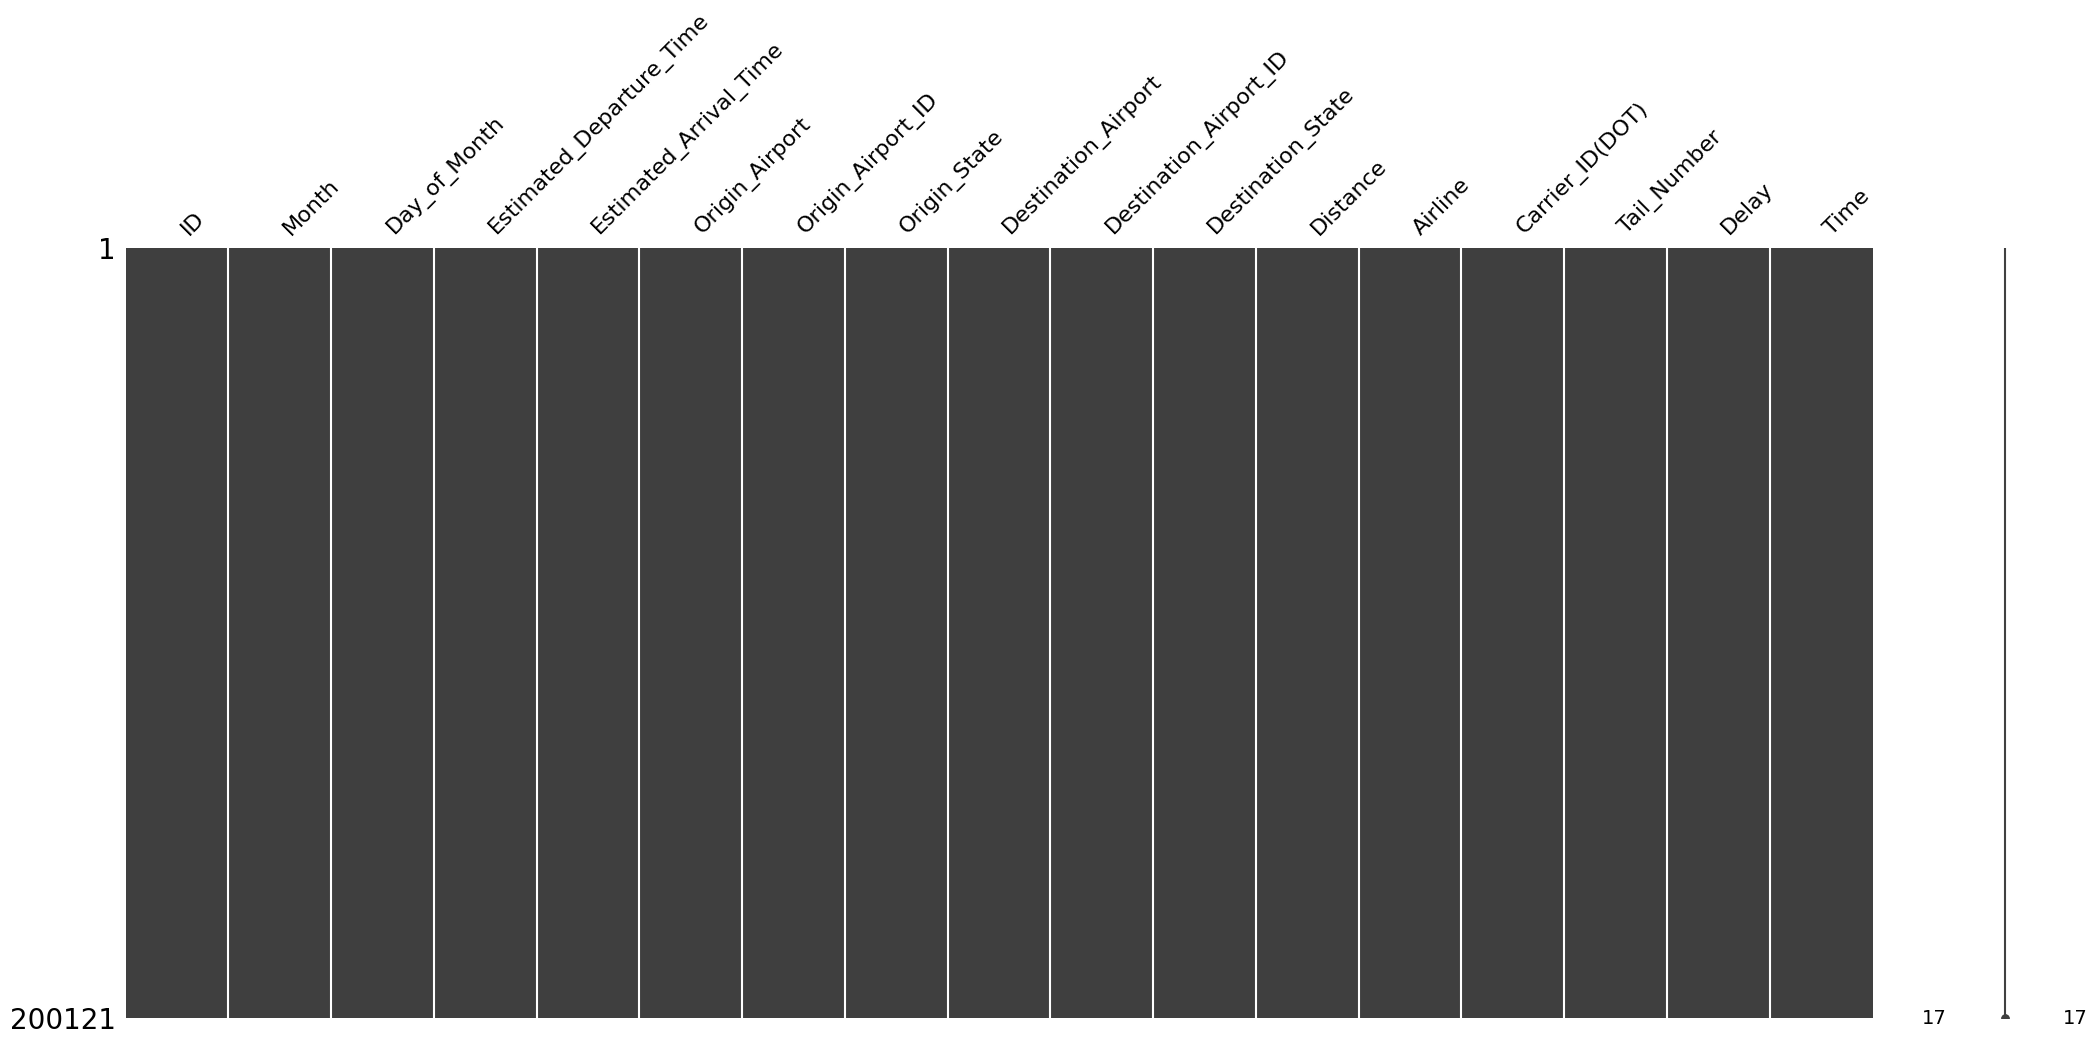

In [16]:
msno.matrix(df_notnull);

In [17]:
### 결측치 처리한 데이터 저장
df_notnull.to_csv('df_notnull.csv')
print('DATA SAVED.')

DATA SAVED.


## 종속변수 LabelEncoding, 파생변수 생성

In [18]:
## Import
df_notnull = pd.read_csv('df_notnull.csv', index_col=0)
df_notnull.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_ID(DOT),Tail_Number,Delay,Time
0,TRAIN_000006,1,20,1742.0,1903.0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,19977.0,N66825,Not_Delayed,81
1,TRAIN_000008,6,13,1420.0,1550.0,BWI,10821,Maryland,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,19393.0,N765SW,Not_Delayed,90
2,TRAIN_000010,8,13,1730.0,1844.0,DCA,11278,Virginia,PIT,14122,Pennsylvania,204.0,Republic Airlines,20452.0,N119HQ,Delayed,74
3,TRAIN_000012,1,12,1015.0,1145.0,CLE,11042,Ohio,DEN,11292,Colorado,1201.0,Southwest Airlines Co.,19393.0,N8696E,Not_Delayed,90
4,TRAIN_000013,9,19,615.0,706.0,MAF,13158,Texas,DEN,11292,Colorado,563.0,SkyWest Airlines Inc.,20304.0,N165SY,Not_Delayed,51


### 1. 종속변수 Label Encoding
- Not_Delayed : 0, Delayed : 1

In [19]:
delay_mapping = {
    'Not_Delayed': 0,
    'Delayed': 1,
}

df_notnull['Delay'] = df_notnull['Delay'].map(delay_mapping)

In [20]:
df_notnull.Delay.value_counts()

Delay
0    164817
1     35304
Name: count, dtype: int64

### 2. 파생변수 생성
- concat_date: (1~365)
- Origin_Region, Destination_Region: 각 주(State)를 유사한 기후대로 묶인 9개 범주
- Season: Spring, Summer, Autumn, Winter
- Parts_of_Day: Early Morning, Morning, Afternoon, Evening

#### 2.1. concat_date
- Month, Day_of_Month 변수를 통합해서 일 단위로 환산

In [21]:
# 각 월의 마지막 일(2월은 28일로 가정)
days_in_month = [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# 각 월까지의 누적 일수
cumulative_days = [sum(days_in_month[:i+1]) for i in range(len(days_in_month))]

# concat_date
df_notnull['concat_date'] = df_notnull.apply(lambda row: cumulative_days[row['Month']-1] + row['Day_of_Month'], axis=1)

#### 2.2. Origin_Region, Destination_Region
- 기후대:주 딕셔너리 활용하여 칼럼 생성

In [22]:
# Region 생성 함수

def get_regions_to_df(df):
    # 딕셔너리 생성: 기후대 별로 9개 + 번외 1개 = 10개
    regions = {
    'Northeast': ["Connecticut", "Delaware", "Maine", "Maryland", "Massachusetts", "New Hampshire", 
                  "New Jersey", "New York", "Pennsylvania", "Rhode Island", "Vermont"],
    'Upper_Midwest': ["Iowa", "Michigan", "Minnesota", "Wisconsin"],
    'Ohio_Valley': ["Illinois", "Indiana", "Kentucky", "Missouri", "Ohio", "Tennessee", "West Virginia"],
    'Southeast': ["Alabama", "Florida", "Georgia", "North Carolina", "South Carolina", "Virginia"],
    'NRP': ["Montana", "Nebraska", "North Dakota", "South Dakota", "Wyoming"],
    'South': ["Arkansas", "Kansas", "Louisiana", "Mississippi", "Oklahoma", "Texas"],
    'Southwest': ["Arizona", "Colorado", "New Mexico", "Utah"],
    'Northwest': ["Idaho", "Oregon", "Washington", "Alaska"],
    'West': ["California", "Nevada", "Hawaii"],
    'etc': ["Puerto Rico", "U.S. Virgin Islands", "U.S. Pacific Trust Territories and Possessions"]
    }

    state_to_region = {state: region for region, states in regions.items() for state in states}   # 주:지역 딕셔너리 생성

    df['Origin_Region'] = df['Origin_State'].map(state_to_region)
    df['Destination_Region'] = df['Destination_State'].map(state_to_region)
    
    return df

# Origin_Region, Destination_Region 칼럼 추가

df_notnull = get_regions_to_df(df_notnull)
df_notnull.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,Destination_State,Distance,Airline,Carrier_ID(DOT),Tail_Number,Delay,Time,concat_date,Origin_Region,Destination_Region
0,TRAIN_000006,1,20,1742.0,1903.0,EWR,11618,New Jersey,BOS,10721,Massachusetts,200.0,United Air Lines Inc.,19977.0,N66825,0,81,20,Northeast,Northeast
1,TRAIN_000008,6,13,1420.0,1550.0,BWI,10821,Maryland,CLT,11057,North Carolina,361.0,Southwest Airlines Co.,19393.0,N765SW,0,90,164,Northeast,Southeast
2,TRAIN_000010,8,13,1730.0,1844.0,DCA,11278,Virginia,PIT,14122,Pennsylvania,204.0,Republic Airlines,20452.0,N119HQ,1,74,225,Southeast,Northeast
3,TRAIN_000012,1,12,1015.0,1145.0,CLE,11042,Ohio,DEN,11292,Colorado,1201.0,Southwest Airlines Co.,19393.0,N8696E,0,90,12,Ohio_Valley,Southwest
4,TRAIN_000013,9,19,615.0,706.0,MAF,13158,Texas,DEN,11292,Colorado,563.0,SkyWest Airlines Inc.,20304.0,N165SY,0,51,262,South,Southwest


#### 2.3. Season

In [23]:
# 계절 생성하는 함수

def get_season(day):
    if 60 <= day <= 151:
        return 'Spring'
    elif 152 <= day <= 243:
        return 'Summer'
    elif 244 <= day <= 334:
        return 'Autumn'
    else:
        return 'Winter'

def get_season_to_df(df):
    df['Season'] = df['concat_date'].apply(get_season)
    return df


# Season 칼럼 추가

df_notnull = get_season_to_df(df_notnull)
df_notnull.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,...,Distance,Airline,Carrier_ID(DOT),Tail_Number,Delay,Time,concat_date,Origin_Region,Destination_Region,Season
0,TRAIN_000006,1,20,1742.0,1903.0,EWR,11618,New Jersey,BOS,10721,...,200.0,United Air Lines Inc.,19977.0,N66825,0,81,20,Northeast,Northeast,Winter
1,TRAIN_000008,6,13,1420.0,1550.0,BWI,10821,Maryland,CLT,11057,...,361.0,Southwest Airlines Co.,19393.0,N765SW,0,90,164,Northeast,Southeast,Summer
2,TRAIN_000010,8,13,1730.0,1844.0,DCA,11278,Virginia,PIT,14122,...,204.0,Republic Airlines,20452.0,N119HQ,1,74,225,Southeast,Northeast,Summer
3,TRAIN_000012,1,12,1015.0,1145.0,CLE,11042,Ohio,DEN,11292,...,1201.0,Southwest Airlines Co.,19393.0,N8696E,0,90,12,Ohio_Valley,Southwest,Winter
4,TRAIN_000013,9,19,615.0,706.0,MAF,13158,Texas,DEN,11292,...,563.0,SkyWest Airlines Inc.,20304.0,N165SY,0,51,262,South,Southwest,Autumn


#### 2.4. Part_of_Day

In [24]:
# 시간대 분류하는 함수
def categorize_parts_of_day(minutes):
    if 0 <= minutes < 360:
        return 'Early Morning'
    elif 360 <= minutes < 720:
        return 'Morning'
    elif 720 <= minutes < 1080:
        return 'Afternoon'
    else:
        return 'Evening'

def get_pod_df(df):
    df['EDT_Part_of_Day'] = df['Estimated_Departure_Time'].apply(categorize_parts_of_day)
    df['EAT_Part_of_Day'] = df['Estimated_Arrival_Time'].apply(categorize_parts_of_day)

    return df


# EDT_Part_of_Day, EAT_Part_of_Day: 시간대 칼럼 추가

df_notnull = get_pod_df(df_notnull)
df_notnull.head()


,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,Destination_Airport_ID,...,Carrier_ID(DOT),Tail_Number,Delay,Time,concat_date,Origin_Region,Destination_Region,Season,EDT_Part_of_Day,EAT_Part_of_Day
0,TRAIN_000006,1,20,1742.0,1903.0,EWR,11618,New Jersey,BOS,10721,...,19977.0,N66825,0,81,20,Northeast,Northeast,Winter,Evening,Evening
1,TRAIN_000008,6,13,1420.0,1550.0,BWI,10821,Maryland,CLT,11057,...,19393.0,N765SW,0,90,164,Northeast,Southeast,Summer,Evening,Evening
2,TRAIN_000010,8,13,1730.0,1844.0,DCA,11278,Virginia,PIT,14122,...,20452.0,N119HQ,1,74,225,Southeast,Northeast,Summer,Evening,Evening
3,TRAIN_000012,1,12,1015.0,1145.0,CLE,11042,Ohio,DEN,11292,...,19393.0,N8696E,0,90,12,Ohio_Valley,Southwest,Winter,Afternoon,Evening
4,TRAIN_000013,9,19,615.0,706.0,MAF,13158,Texas,DEN,11292,...,20304.0,N165SY,0,51,262,South,Southwest,Autumn,Morning,Morning


In [25]:
df_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200121 entries, 0 to 200120
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        200121 non-null  object 
 1   Month                     200121 non-null  int64  
 2   Day_of_Month              200121 non-null  int64  
 3   Estimated_Departure_Time  200121 non-null  float64
 4   Estimated_Arrival_Time    200121 non-null  float64
 5   Origin_Airport            200121 non-null  object 
 6   Origin_Airport_ID         200121 non-null  int64  
 7   Origin_State              200121 non-null  object 
 8   Destination_Airport       200121 non-null  object 
 9   Destination_Airport_ID    200121 non-null  int64  
 10  Destination_State         200121 non-null  object 
 11  Distance                  200121 non-null  float64
 12  Airline                   200121 non-null  object 
 13  Carrier_ID(DOT)           200121 non-null  float6

In [26]:
# 파생변수 생성된 데이터 저장
df_notnull.to_csv('df_preprocessed.csv')
print('DATA SAVED.')

DATA SAVED.
